In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
coro = pd.read_csv("2019_nCoV_data_02-29-2020.csv")

In [26]:
coroko = coro[coro['Country/Region']=='South Korea'][["Last Update",'Confirmed']].iloc[25:,].reset_index(drop=True)
coroko.head()

,Last Update,Confirmed
0,2020-02-16T01:33:02,29.0
1,2020-02-17T23:43:01,30.0
2,2020-02-18T03:43:02,31.0
3,2020-02-18T03:43:02,31.0
4,2020-02-20T09:53:02,104.0


In [27]:
coroko["Last Update"] = coroko["Last Update"].str.slice(start=0, stop=10)
coroko

,Last Update,Confirmed
0,2020-02-16,29.0
1,2020-02-17,30.0
2,2020-02-18,31.0
3,2020-02-18,31.0
4,2020-02-20,104.0
5,2020-02-21,204.0
6,2020-02-22,433.0
7,2020-02-23,602.0
8,2020-02-24,833.0
9,2020-02-25,977.0


In [29]:
coroko.columns = ['date','number']
coroko = coroko.append([
    {'date' : '2020-03-01', 'number':3736},{'date' : '2020-03-02', 'number':4335}
], ignore_index=True)
coroko['date'] = pd.to_datetime(coroko['date'])
coroko.tail()

,date,number
11,2020-02-27,1766.0
12,2020-02-28,2337.0
13,2020-02-29,3150.0
14,2020-03-01,3736.0
15,2020-03-02,4335.0


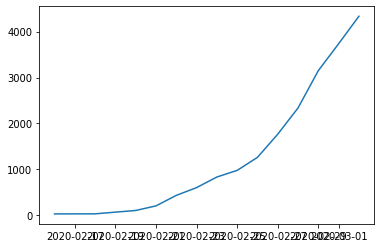

In [31]:
plt.plot(coroko.date,coroko.number)

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


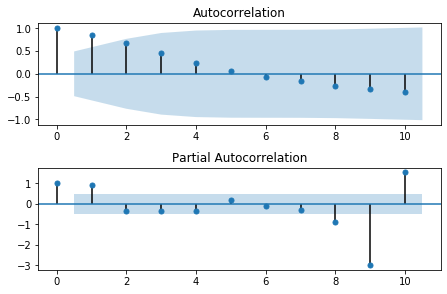

In [33]:
import statsmodels.api as sm
ax1 = plt.subplot(211)
sm.graphics.tsa.plot_acf(coroko.number, lags=10, ax=ax1)
ax2 = plt.subplot(212)
sm.graphics.tsa.plot_pacf(coroko.number, lags=10, ax=ax2)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()
# m = sm.tsa.ARIMA(df.y, [0,1,1])
# r = m.fit()
# print(r.summary())

In [60]:
# coroko = coroko.set_index('date')
m = sm.tsa.ARMA(np.log(coroko.number), (2, 0))
r = m.fit(trend='nc',disp=1)
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                 number   No. Observations:                   16
Model:                     ARMA(2, 0)   Log Likelihood                 -14.946
Method:                       css-mle   S.D. of innovations              0.325
Date:                Mon, 02 Mar 2020   AIC                             35.891
Time:                        22:25:11   BIC                             38.209
Sample:                             0   HQIC                            36.010
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.number     1.6806   1.86e-05   9.02e+04      0.000       1.681       1.681
ar.L2.number    -0.6806   7.54e-06  -9.02e+04      0.000      -0.681      -0.681
                                    Roots   

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


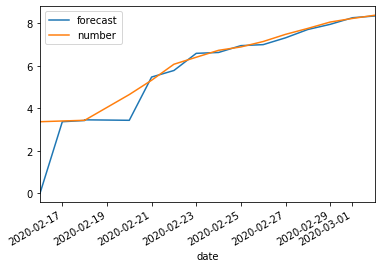

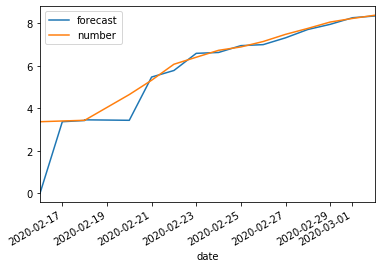

In [61]:
r.plot_predict()

In [62]:
s_pred = r.forecast(steps=7)
s_pred

(array([8.47568142, 8.54455793, 8.59143302, 8.62333467, 8.64504587,
        8.65982177, 8.66987775]),
 array([0.32471513, 0.63500763, 0.94222962, 1.23504558, 1.50962709,
        1.76555125, 2.0038684 ]),
 array([[ 7.83925147,  9.11211138],
        [ 7.29996584,  9.78915001],
        [ 6.74469691, 10.43816914],
        [ 6.20268981, 11.04397953],
        [ 5.68623115, 11.60386058],
        [ 5.19940492, 12.12023863],
        [ 4.74236786, 12.59738763]]))

In [64]:
np.exp(s_pred[0])

array([4796.69022304, 5138.71295196, 5385.3254471 , 5559.8959222 ,
       5681.92785529, 5766.50682391, 5824.78720613])